# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/ExtAudioDataModelQuant.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModel.tflite".
Model size 9.4140625 Kb
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


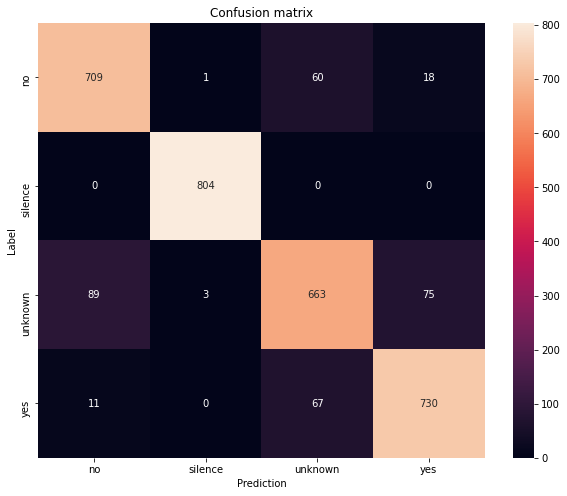

              precision    recall  f1-score   support

          no    0.87639   0.89975   0.88791       788
     silence    0.99505   1.00000   0.99752       804
     unknown    0.83924   0.79880   0.81852       830
         yes    0.88700   0.90347   0.89516       808

    accuracy                        0.89969      3230
   macro avg    0.89942   0.90050   0.89978      3230
weighted avg    0.89903   0.89969   0.89918      3230

Average time: 0.12427350684954286 ms
Max time: 2.1507740020751953 ms
Min time: 0.07534027099609375 ms
Using 452 samples.


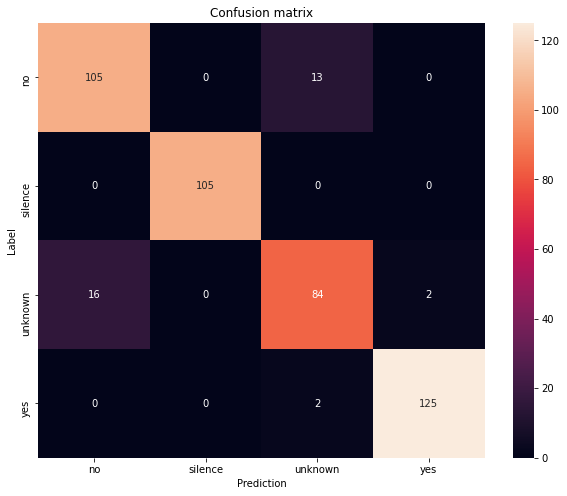

              precision    recall  f1-score   support

          no    0.86777   0.88983   0.87866       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.84848   0.82353   0.83582       102
         yes    0.98425   0.98425   0.98425       127

    accuracy                        0.92699       452
   macro avg    0.92513   0.92440   0.92468       452
weighted avg    0.92686   0.92699   0.92685       452

Average time: 0.1216499151381771 ms
Max time: 0.7913112640380859 ms
Min time: 0.07843971252441406 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path)

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test externa y los datos captados
con el microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow lite/ExtAudioDataModelQuant.tflite".
Model size 4.875 Kb
Using 3230 samples.


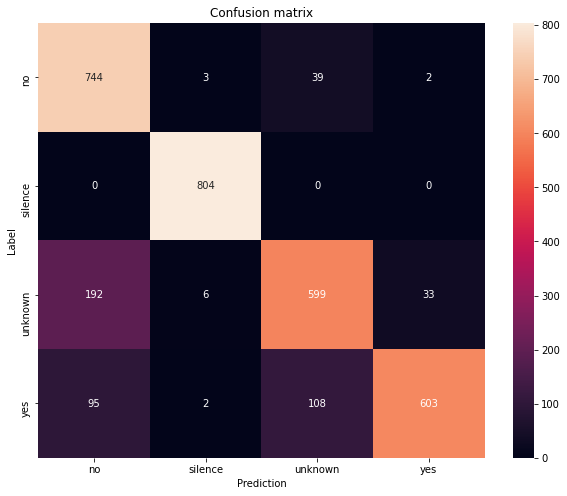

              precision    recall  f1-score   support

          no    0.72163   0.94416   0.81803       788
     silence    0.98650   1.00000   0.99321       804
     unknown    0.80295   0.72169   0.76015       830
         yes    0.94514   0.74629   0.83402       808

    accuracy                        0.85139      3230
   macro avg    0.86406   0.85303   0.85135      3230
weighted avg    0.86437   0.85139   0.85076      3230

Average time: 0.5318231257860875 ms
Max time: 19.046545028686523 ms
Min time: 0.3695487976074219 ms
Using 452 samples.


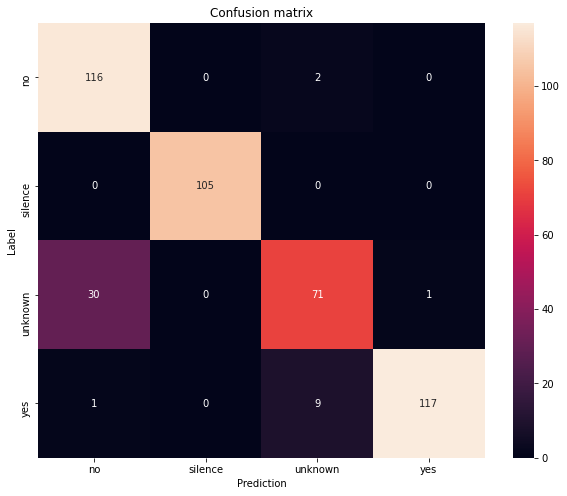

              precision    recall  f1-score   support

          no    0.78912   0.98305   0.87547       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.86585   0.69608   0.77174       102
         yes    0.99153   0.92126   0.95510       127

    accuracy                        0.90487       452
   macro avg    0.91162   0.90010   0.90058       452
weighted avg    0.91229   0.90487   0.90337       452

Average time: 0.5281847135155602 ms
Max time: 0.7355213165283203 ms
Min time: 0.3807544708251953 ms
Quantized models perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, [ext_data_test_dir, micro_data_all_dir], label_index_path,
                                 quantized=True)

